In [69]:
import os
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from tensorflow import keras


In [2]:
# Load the raw CIFAR-10 data
train_ds, test_ds = tfds.load("cifar10",
                              split=[tfds.Split.TRAIN, tfds.Split.TEST],
                              batch_size=-1)

In [64]:
train_images = train_ds["image"]
test_images = test_ds["image"]
train_images.shape

TensorShape([50000, 32, 32, 3])

In [63]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

train_labels = train_ds["label"]
test_labels = test_ds["label"]
train_labels.shape

TensorShape([50000])

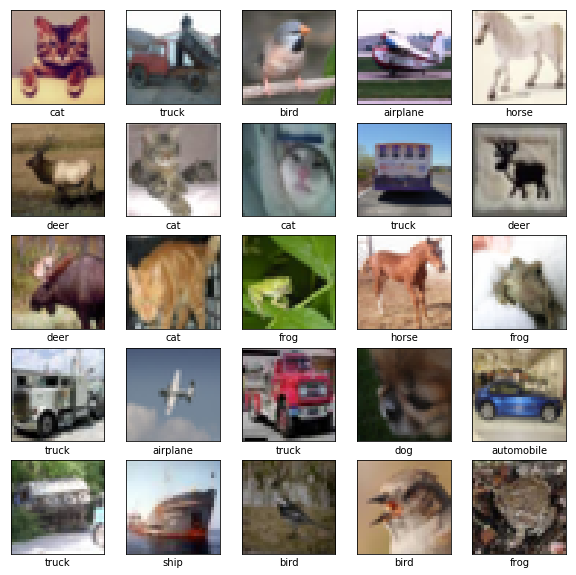

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [40]:
train_images[0].numpy().min()
train_images[0].numpy().max()

243

In [43]:
x_train = train_images.astype('float32')
x_train /= 255

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'astype'

In [46]:
# the use of batch normalization
# https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation= "softmax")
])

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               393344    
_________________________________________________________________
batch_normalization_v2 (Batc (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 395,146
Trainable params: 394,890
Non-trainable params: 256
_________________________________________________________________


In [49]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 6s 122us/sample - loss: 1.8236 - accuracy: 0.3633
Epoch 2/5
50000/50000 [==============================] - 7s 136us/sample - loss: 1.7318 - accuracy: 0.3972
Epoch 3/5
50000/50000 [==============================] - 6s 128us/sample - loss: 1.6742 - accuracy: 0.4142
Epoch 4/5
50000/50000 [==============================] - 6s 124us/sample - loss: 1.6530 - accuracy: 0.4211
Epoch 5/5
50000/50000 [==============================] - 6s 124us/sample - loss: 1.6210 - accuracy: 0.4304


In [53]:
# code from here https://keras.io/examples/cifar10_cnn/

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

cnn_model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512),
    BatchNormalization(),
    Dense(10),
    BatchNormalization(),
    Activation('softmax')
])

In [54]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v2_6 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_v2_7 (Ba (None, 30, 30, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)       

In [57]:
cnn_model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 322s 6ms/sample - loss: 1.2353 - accuracy: 0.5910
Epoch 2/5
50000/50000 [==============================] - 304s 6ms/sample - loss: 0.8956 - accuracy: 0.7058
Epoch 3/5
50000/50000 [==============================] - 316s 6ms/sample - loss: 0.7662 - accuracy: 0.7431
Epoch 4/5
50000/50000 [==============================] - 324s 6ms/sample - loss: 0.6792 - accuracy: 0.7725
Epoch 5/5
50000/50000 [==============================] - 379s 8ms/sample - loss: 0.6150 - accuracy: 0.7920


In [61]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/zhenxing/Documents/zero_to_deep_learning_video/notebooks/saved_models/keras_cifar10_trained_model.h5 


In [65]:
# Score trained model.
scores = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 68us/sample - loss: 1.6847 - accuracy: 0.3963
Test loss: 1.6846656949996948
Test accuracy: 0.3963


10000/10000 - 8s
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[621  14  34  42  63  14   2  12 112  86]
 [  8 765   3   7   9   3   3   5  17 180]
 [ 30   3 509  95 191  56  57  17  14  28]
 [  7   2  26 610 118 145  23  21  18  30]
 [  3   1   8  37 878  12  20  18  14   9]
 [  0   1  19 147  85 675   6  38  15  14]
 [  3   0  14 106 101  15 743   3   7   8]
 [  4   2   8  33 102  34   7 773   8  29]
 [ 13  15   4  10   9   2   2   2 901  42]
 [  7  17   0   8  10   2   0   1  16 939]]


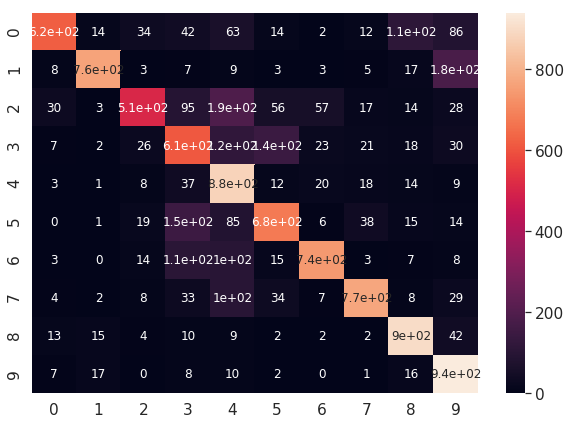

In [73]:
# Confusion matrix result, 
# code from here: https://ermlab.com/en/blog/nlp/cifar-10-classification-using-keras-tutorial/

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_model.predict(test_images, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(test_labels,y_pred)[ix].sum())
cm = confusion_matrix(test_labels,y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd

df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [75]:
# code from here https://www.tensorflow.org/tutorials/keras/basic_classification
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

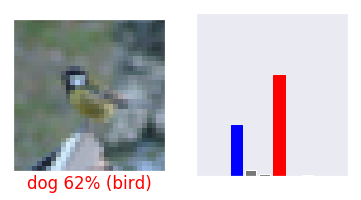

In [77]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, Y_pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, Y_pred,  test_labels)
plt.show()

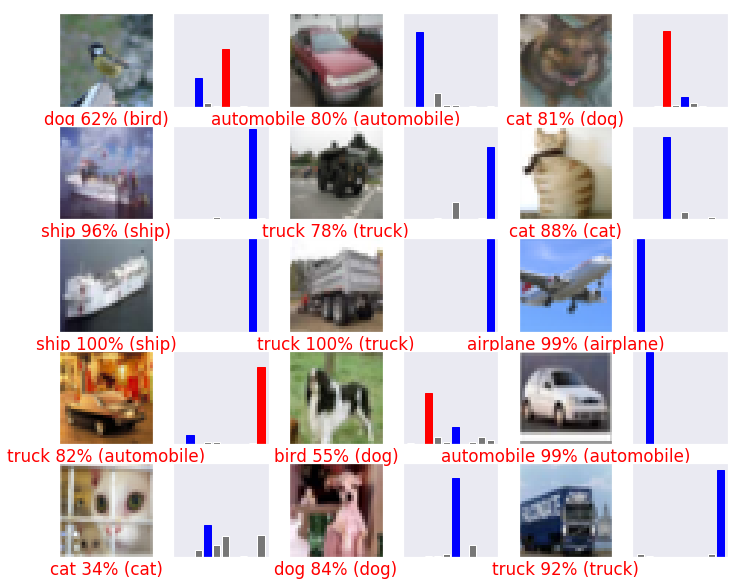

In [79]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, Y_pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, Y_pred, test_labels)
plt.show()